In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_style("white")

In [2]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230524_2_multitask_model_5fold/fold0/"

D:\LUNA23-ISMI-Group7


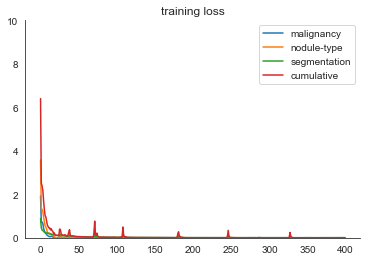

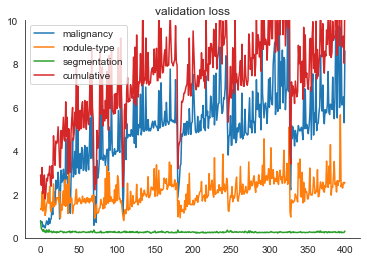

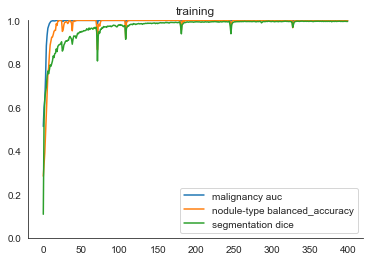

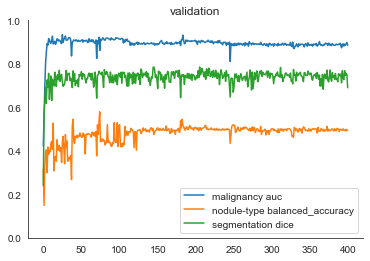

In [5]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "noduletype": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [8]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230524_2_multitask_model_5fold/fold1/"

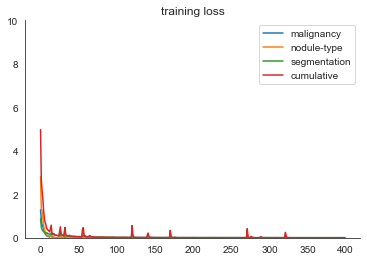

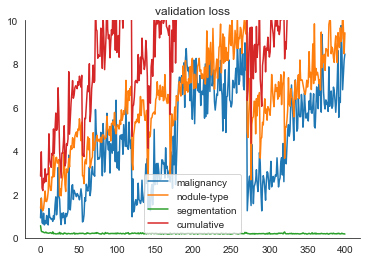

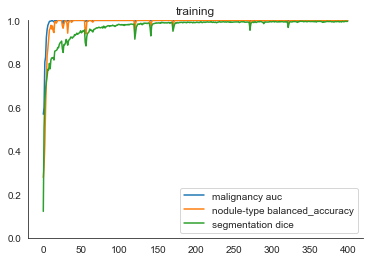

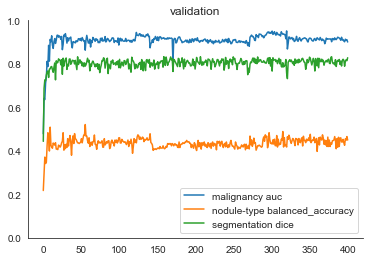

In [9]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [10]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230524_2_multitask_model_5fold/fold2/"

Segmentation score (dice) = 0.7073842406272888
Nodule-type score (balanced accuracy) = 0.6388600588133541
Malignancy score (auc) = 0.8626168224299066
Overall score = 0.767869486075114


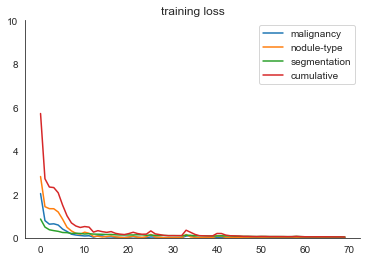

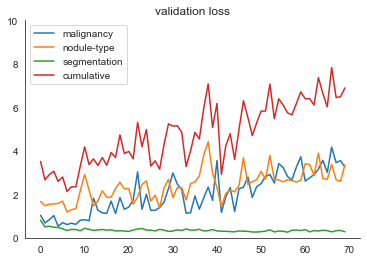

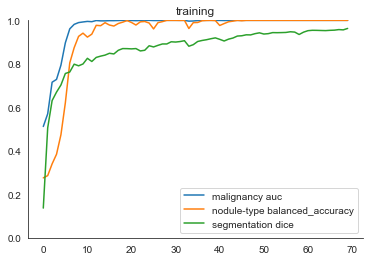

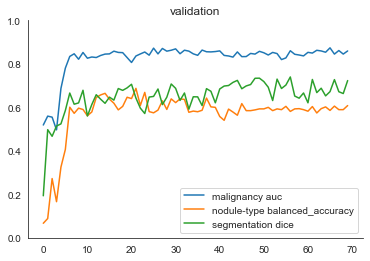

In [11]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "noduletype": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [12]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230524_2_multitask_model_5fold/fold3/"

Segmentation score (dice) = 0.7797566321161058
Nodule-type score (balanced accuracy) = 0.45682800345721697
Malignancy score (auc) = 0.8827956989247312
Overall score = 0.7505440083556963


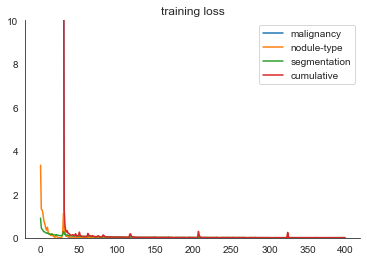

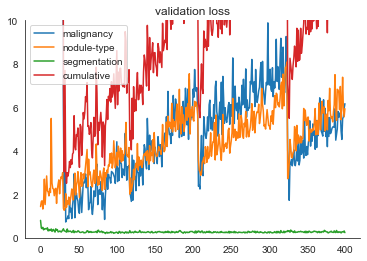

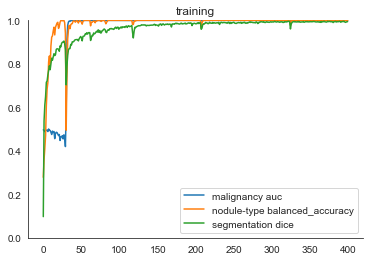

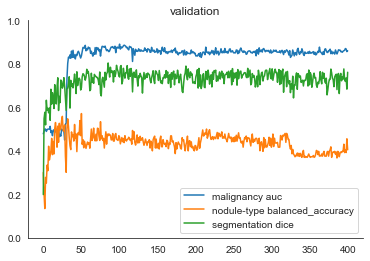

In [13]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [14]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230524_2_multitask_model_5fold/fold4/"

Segmentation score (dice) = 0.6437033944659762
Nodule-type score (balanced accuracy) = 0.45869963369963374
Malignancy score (auc) = 0.9130769230769231
Overall score = 0.7321392185798641


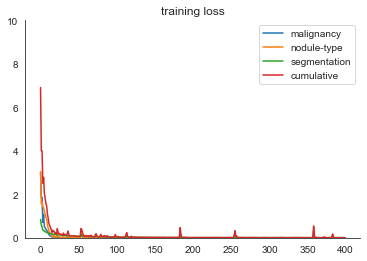

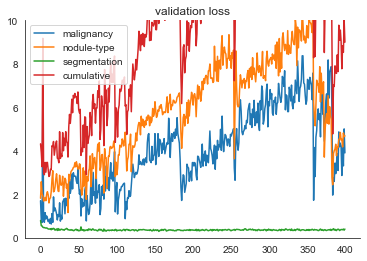

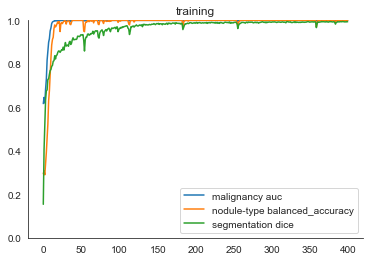

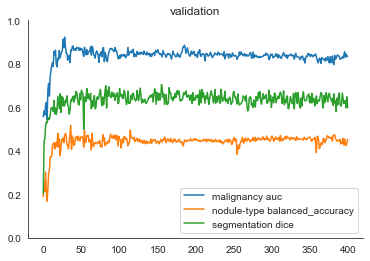

In [15]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [ ]:
labels = np.load(workspace / "results" / model_id / "labels.npy", allow_pickle=True).item()
predictions = np.load(workspace / "results" / model_id / "predictions.npy", allow_pickle=True).item()

In [ ]:
confusion_matrix(labels['malignancy'], predictions['malignancy'])

In [ ]:
confusion_matrix(labels['nodule-type'], predictions['nodule-type'])